# White-box Attack on CIFAR10

In [1]:
import sys
import datetime
import torch
import torch.nn as nn
#Thêm đường dẫn của thư mục cha của tệp hiện tại vào danh sách 
#các đường dẫn mà Python sẽ tìm kiếm các gói và mô-đun
sys.path.insert(0, '..') 
import torchattacks

## Load model and data

In [2]:
sys.path.insert(0, '..')
import robustbench
from robustbench.data import load_cifar10
from robustbench.utils import load_model, clean_accuracy
images, labels = load_cifar10(n_examples=50)
print('[Data loaded]')
device = "cuda"
model = load_model('Standard', norm='Linf').to(device)
acc = clean_accuracy(model, images.to(device), labels.to(device))
print('[Model loaded]')
print('Acc: %2.2f %%'%(acc*100))

C:\Users\DELL 3520\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


Files already downloaded and verified
[Data loaded]
[Model loaded]
Acc: 96.00 %


## Adversarial Attack

In [3]:
from torchattacks import PGD
from torchattacks import FGSM
from utils import imshow, get_pred

In [4]:
atk = torchattacks.PGD(model, eps=8/255, alpha=2/255, steps=10, random_start=True)
start = datetime.datetime.now()
adv_images = atk(images, labels)
end = datetime.datetime.now()
acc = clean_accuracy(model, adv_images, labels)
print('- Robust Acc: {} ({} ms)'.format(acc, int((end-start).total_seconds()*1000)))

- Robust Acc: 0.0 (4660 ms)


In [5]:
atk = torchattacks.FGSM(model, eps=8/255)
start = datetime.datetime.now()
adv_images = atk(images, labels)
end = datetime.datetime.now()
acc = clean_accuracy(model, adv_images, labels)
print('- Robust Acc: {} ({} ms)'.format(acc, int((end-start).total_seconds()*1000)))

- Robust Acc: 0.34 (35 ms)


In [6]:
atk_fgsm = FGSM(model, eps=8/255)
print(atk_fgsm)

FGSM(model_name=WideResNet, device=cuda:0, attack_mode=default, targeted=False, normalization_used=False, eps=0.03137254901960784)


In [7]:
atk_pgd = PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
print(atk_pgd)

PGD(model_name=WideResNet, device=cuda:0, attack_mode=default, targeted=False, normalization_used=False, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [10]:
adv_images_fgsm = atk_fgsm(images, labels)

In [11]:
adv_images_pgd = atk_pgd(images, labels)

Ảnh gốc thứ: 1

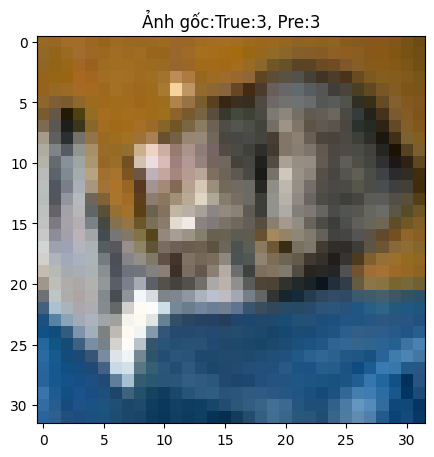

Ảnh sau khi thêm nhiễu: 1


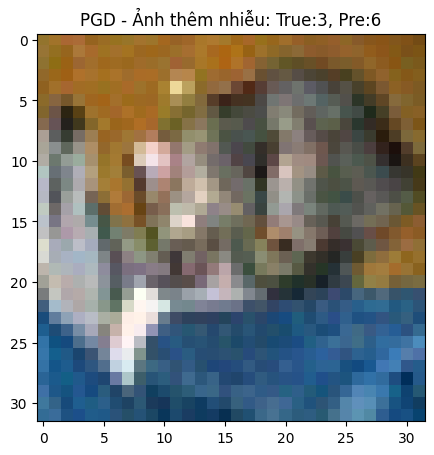

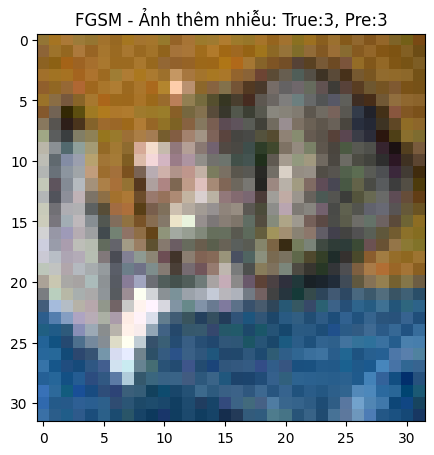

Ảnh gốc thứ: 2

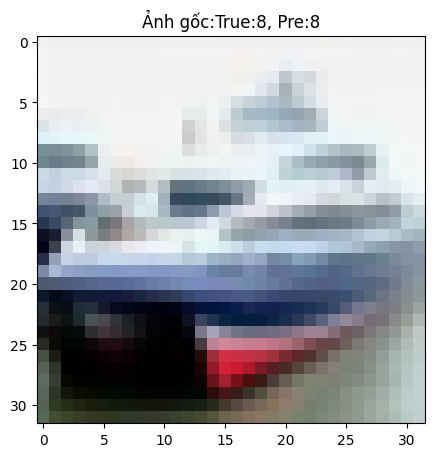

Ảnh sau khi thêm nhiễu: 2


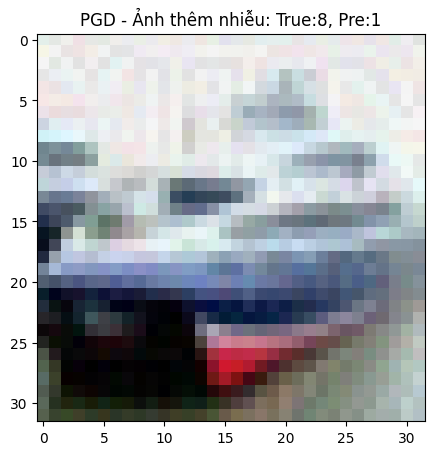

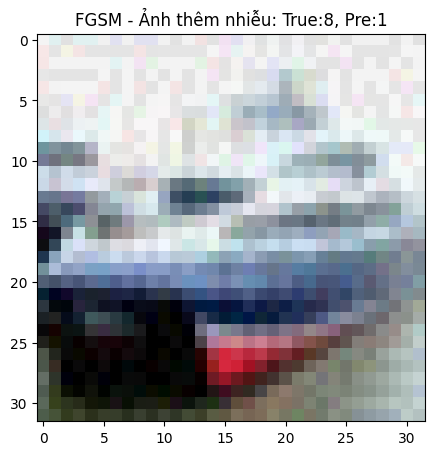

Ảnh gốc thứ: 3

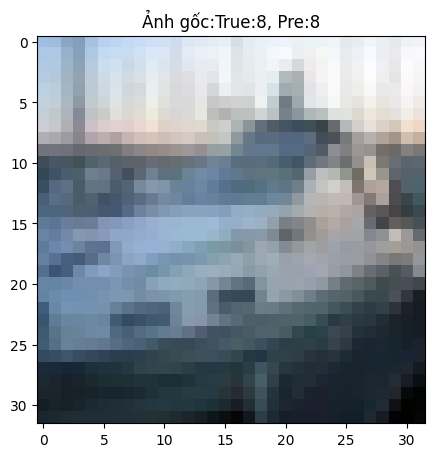

Ảnh sau khi thêm nhiễu: 3


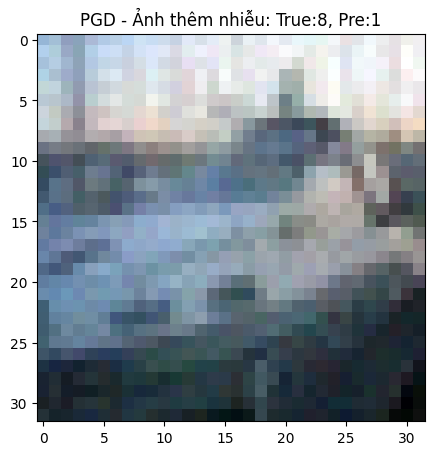

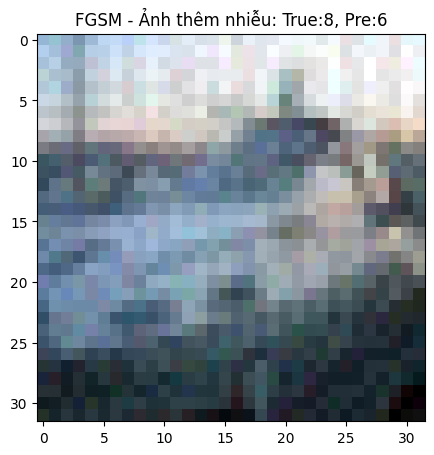

Ảnh gốc thứ: 4

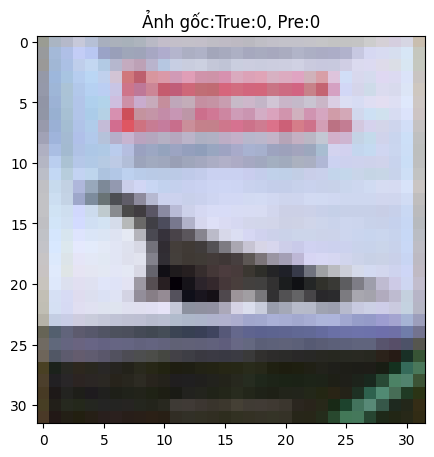

Ảnh sau khi thêm nhiễu: 4


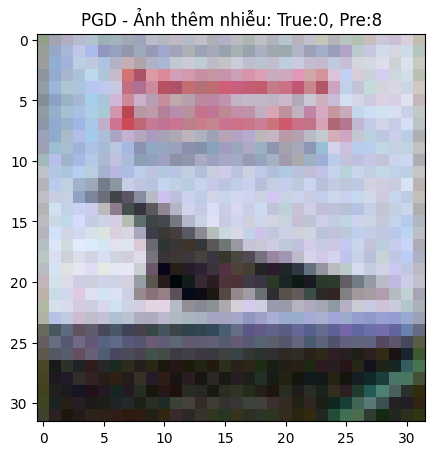

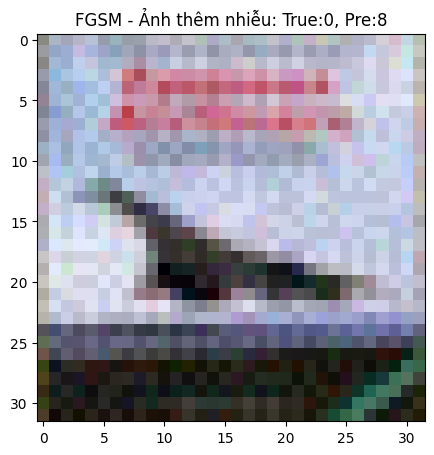

Ảnh gốc thứ: 5

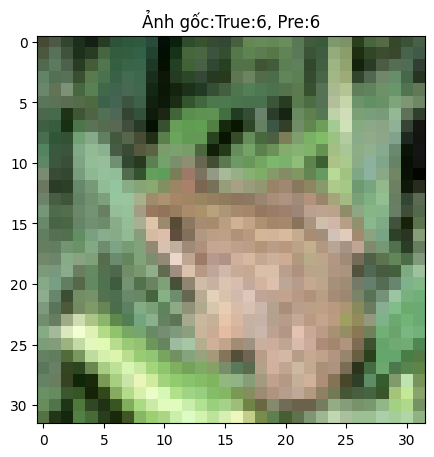

Ảnh sau khi thêm nhiễu: 5


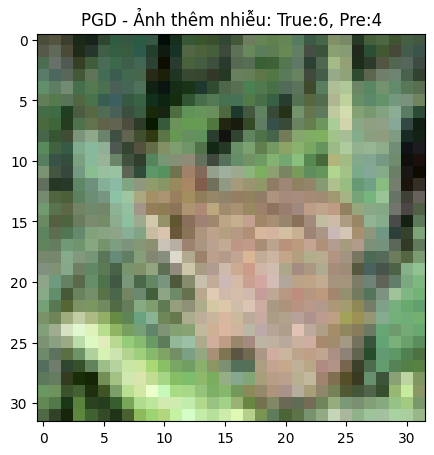

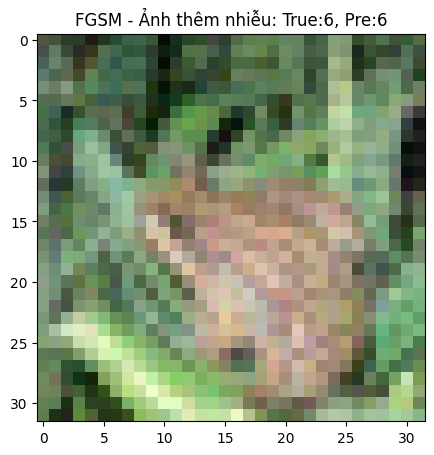

Ảnh gốc thứ: 6

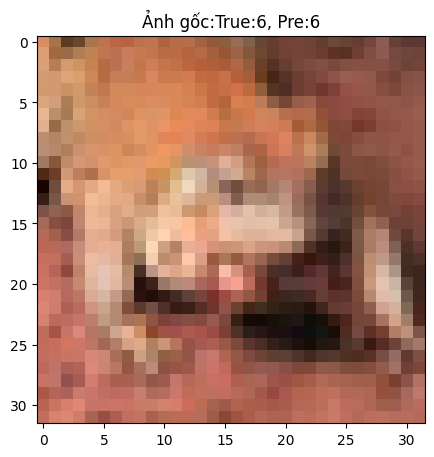

Ảnh sau khi thêm nhiễu: 6


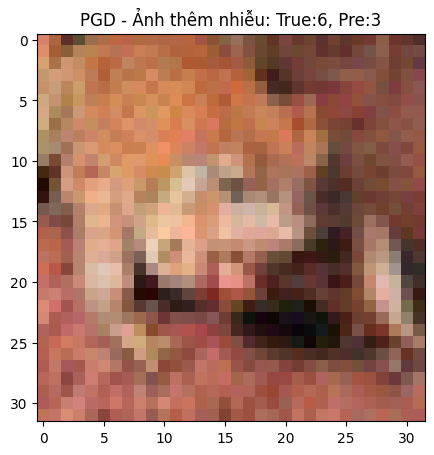

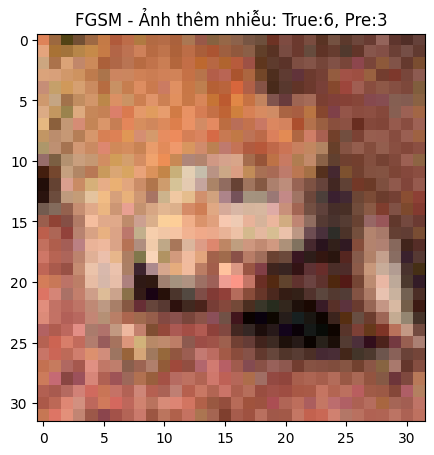

Ảnh gốc thứ: 7

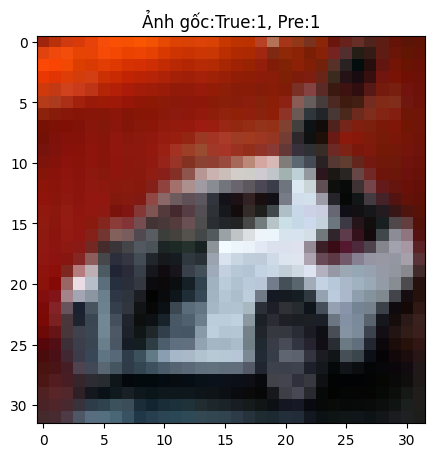

Ảnh sau khi thêm nhiễu: 7


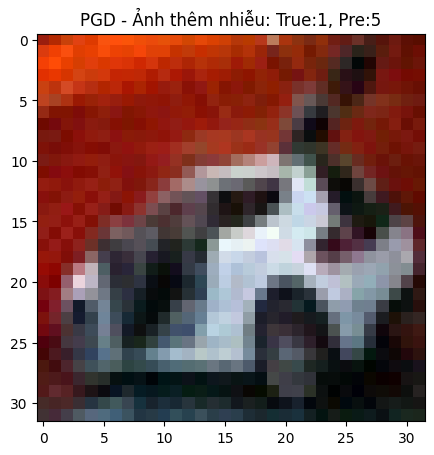

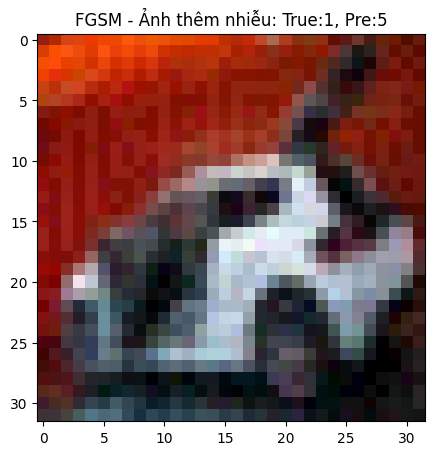

Ảnh gốc thứ: 8

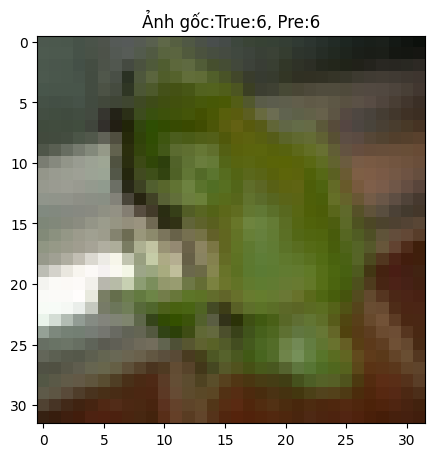

Ảnh sau khi thêm nhiễu: 8


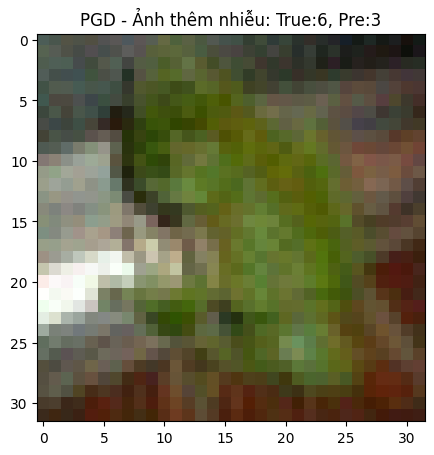

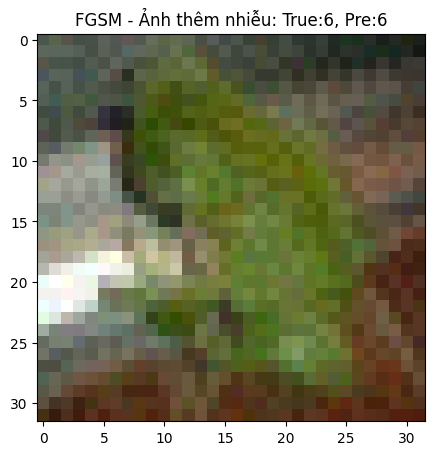

Ảnh gốc thứ: 9

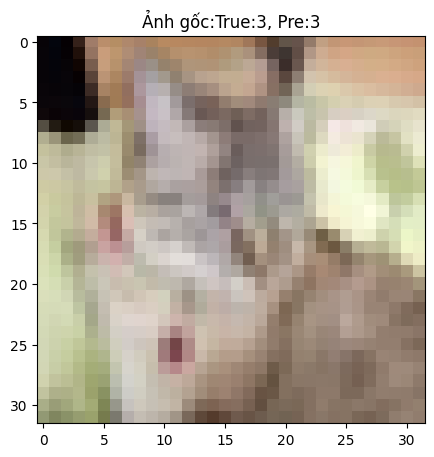

Ảnh sau khi thêm nhiễu: 9


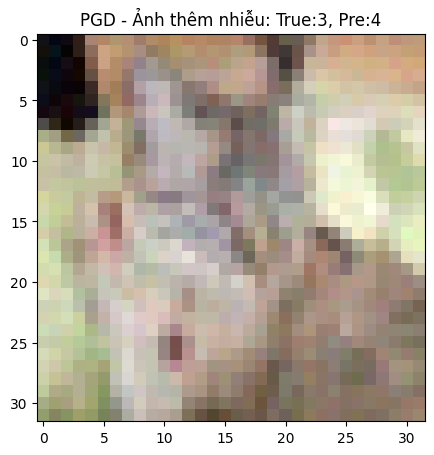

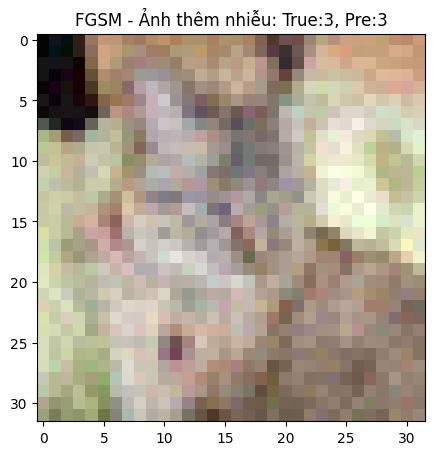

Ảnh gốc thứ: 10

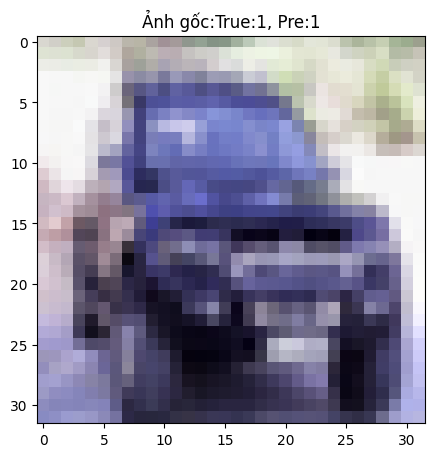

Ảnh sau khi thêm nhiễu: 10


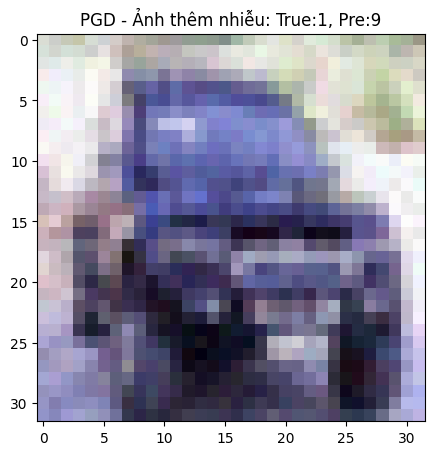

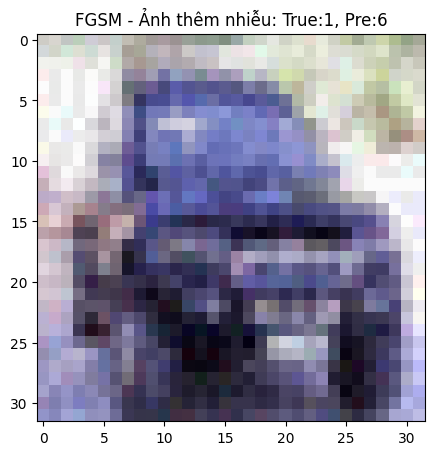

Ảnh gốc thứ: 11

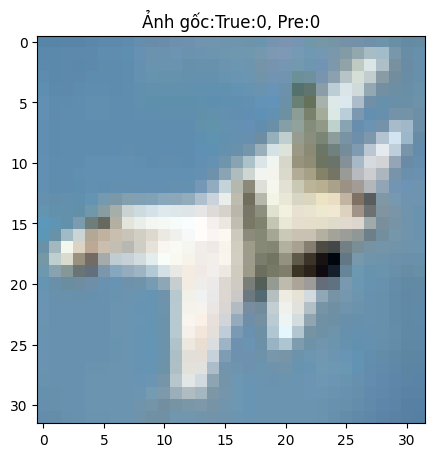

Ảnh sau khi thêm nhiễu: 11


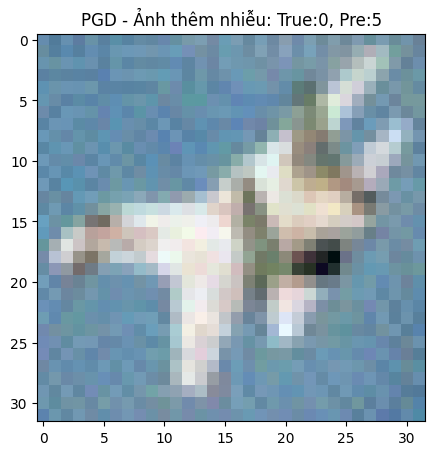

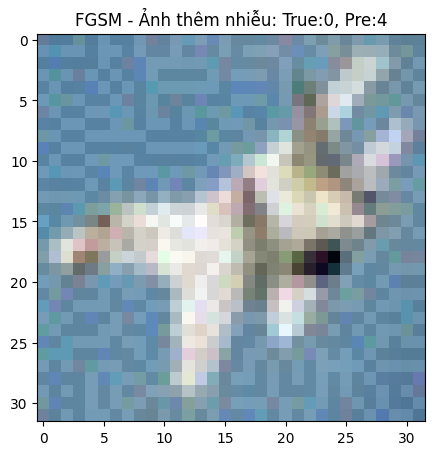

Ảnh gốc thứ: 12

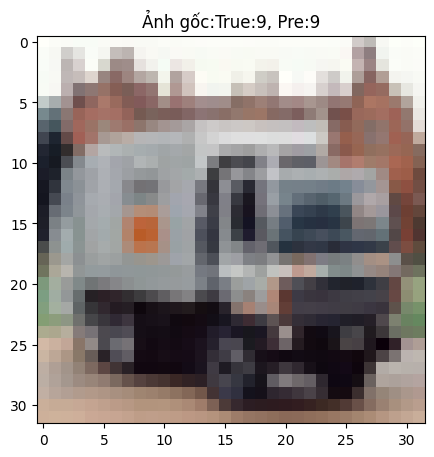

Ảnh sau khi thêm nhiễu: 12


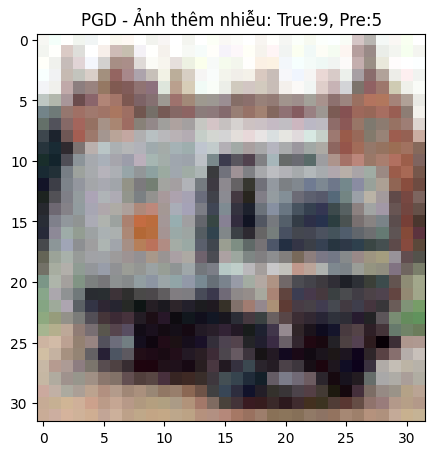

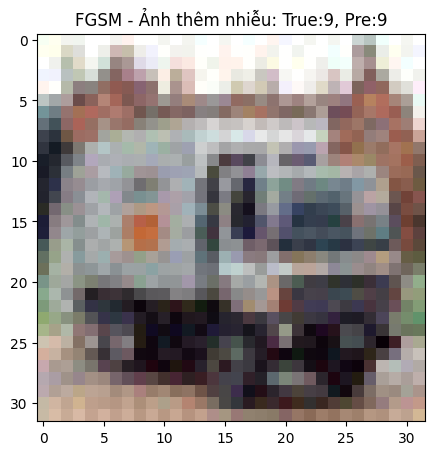

Ảnh gốc thứ: 13

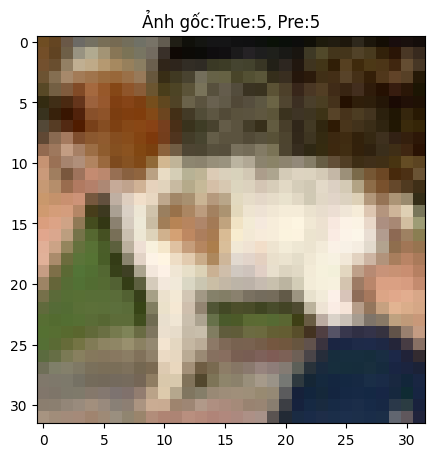

Ảnh sau khi thêm nhiễu: 13


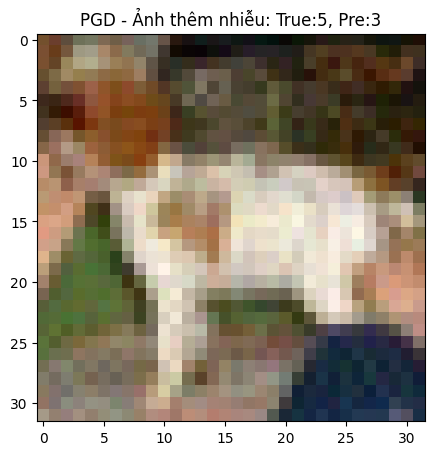

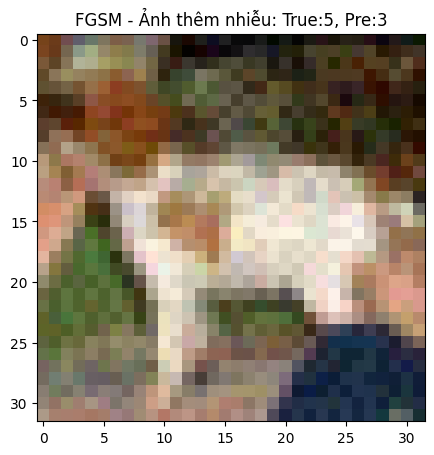

Ảnh gốc thứ: 14

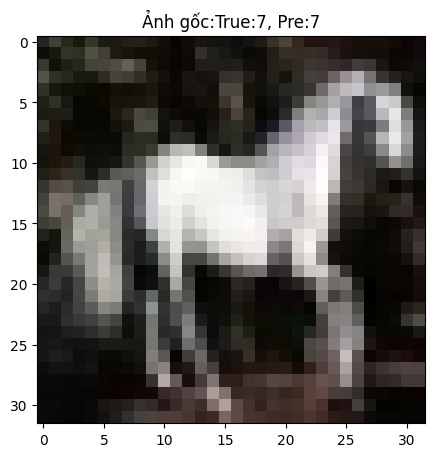

Ảnh sau khi thêm nhiễu: 14


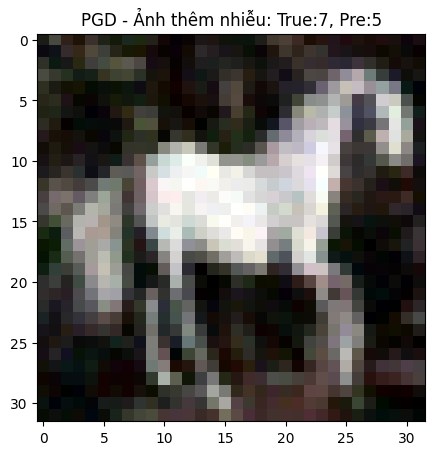

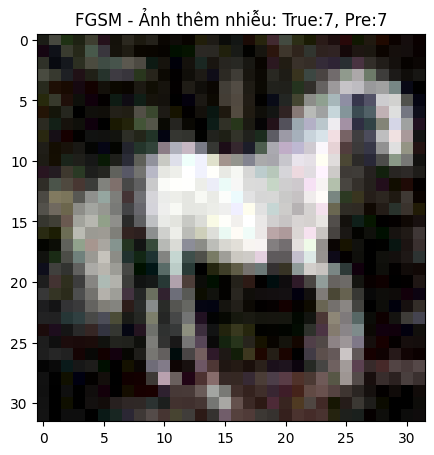

Ảnh gốc thứ: 15

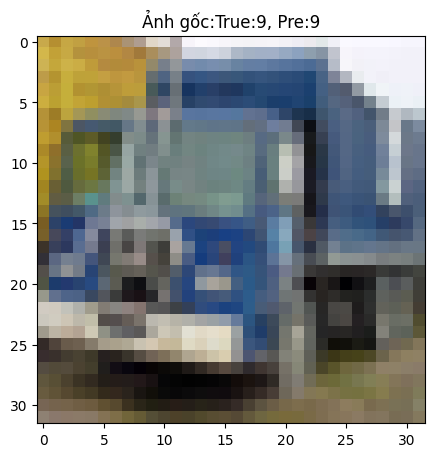

Ảnh sau khi thêm nhiễu: 15


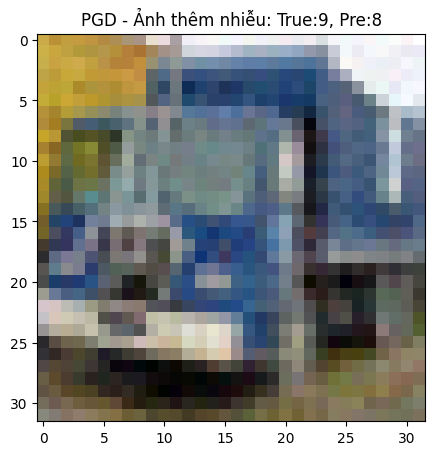

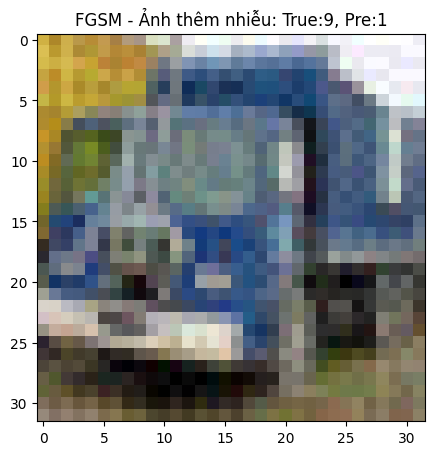

Ảnh gốc thứ: 16

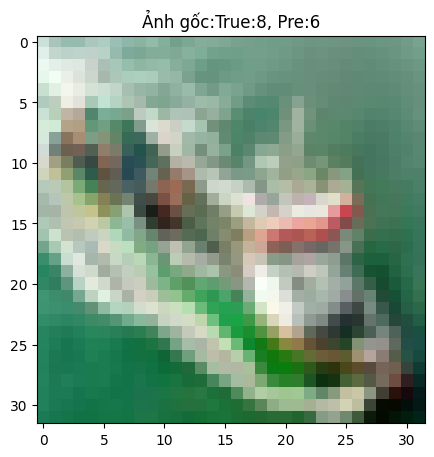

Ảnh sau khi thêm nhiễu: 16


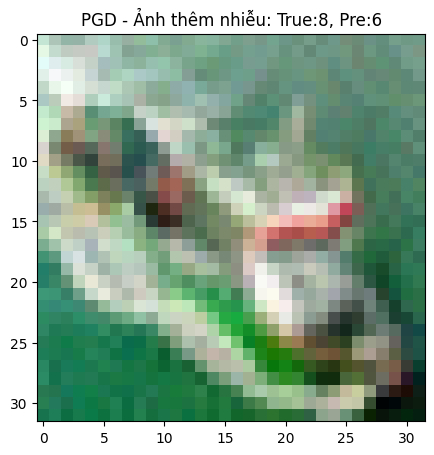

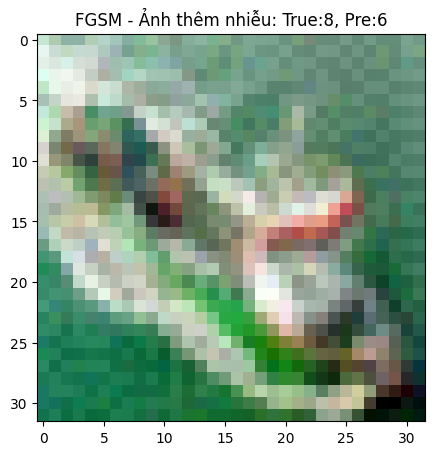

Ảnh gốc thứ: 17

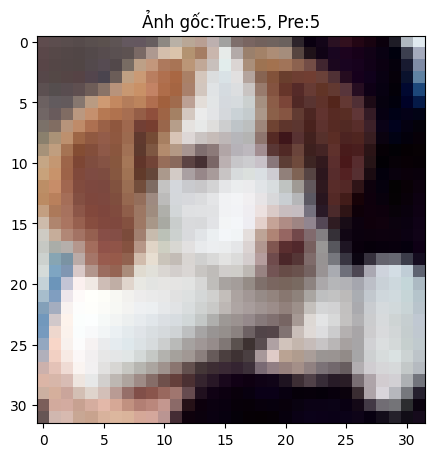

Ảnh sau khi thêm nhiễu: 17


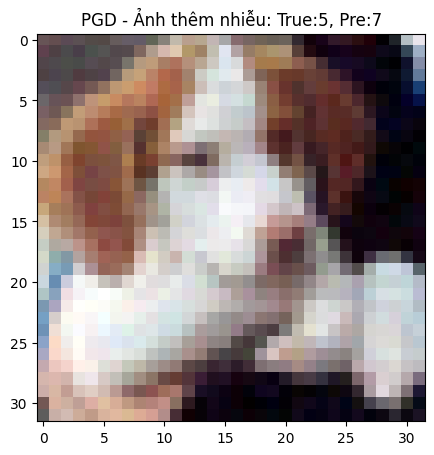

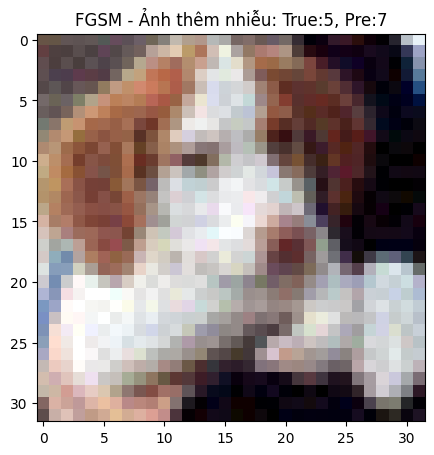

Ảnh gốc thứ: 18

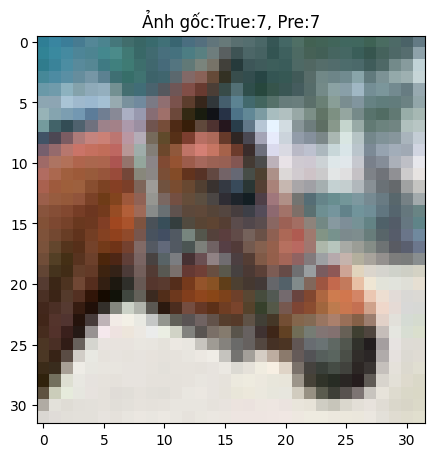

Ảnh sau khi thêm nhiễu: 18


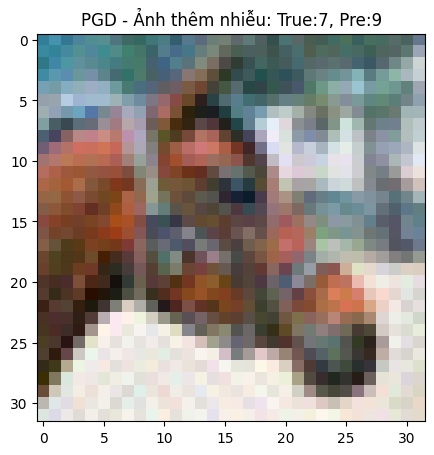

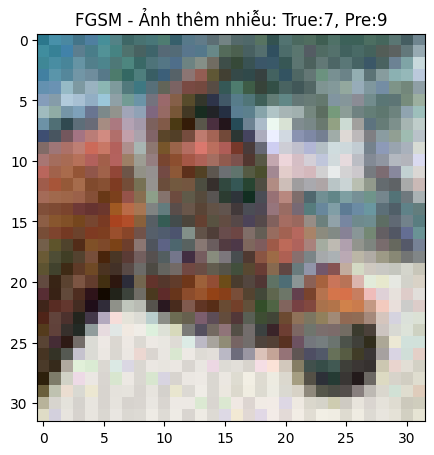

Ảnh gốc thứ: 19

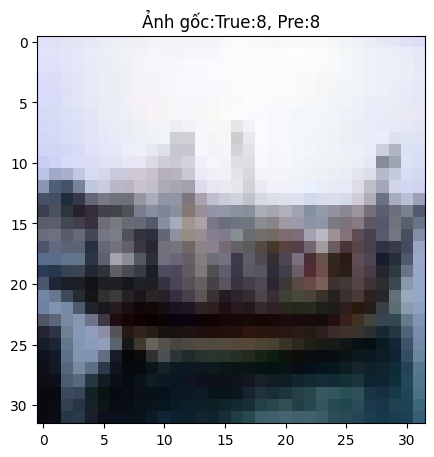

Ảnh sau khi thêm nhiễu: 19


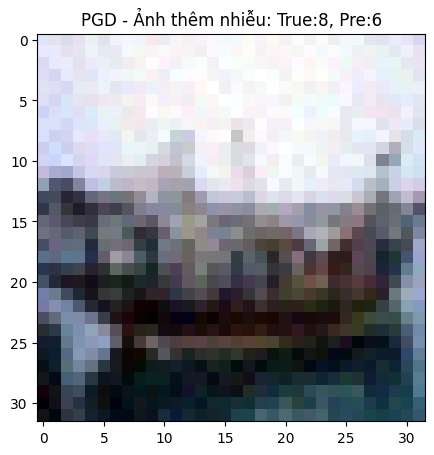

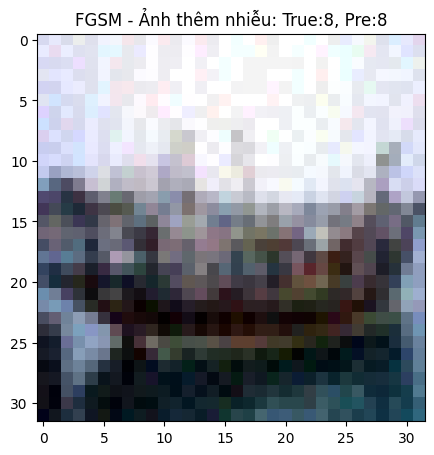

Ảnh gốc thứ: 20

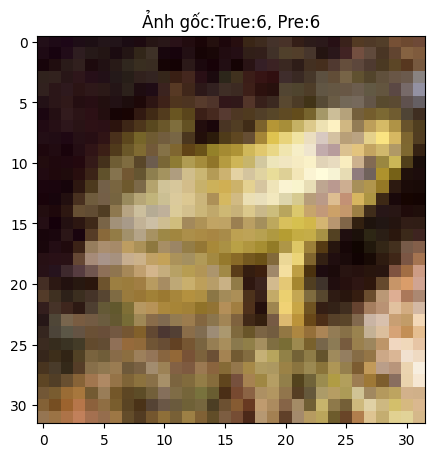

Ảnh sau khi thêm nhiễu: 20


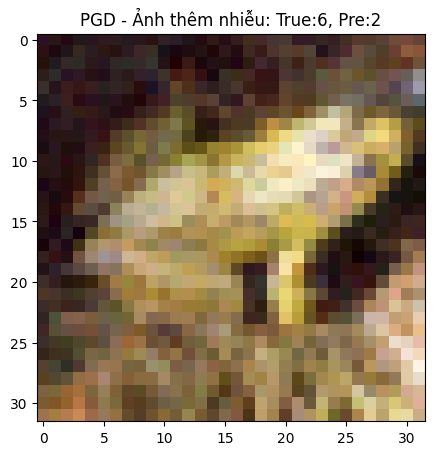

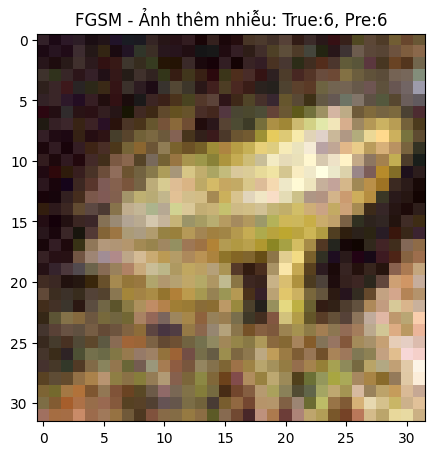

Ảnh gốc thứ: 21

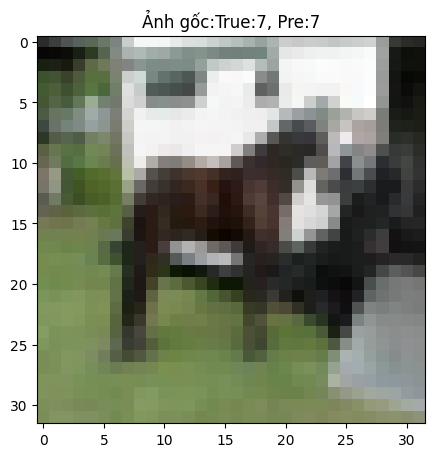

Ảnh sau khi thêm nhiễu: 21


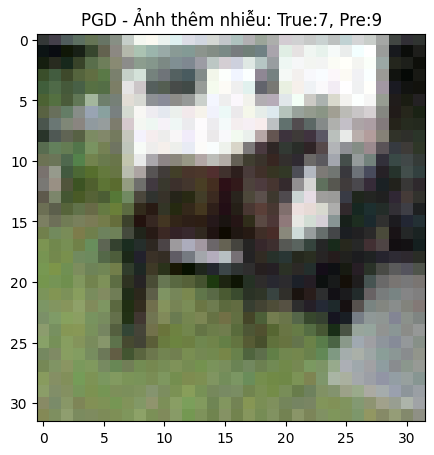

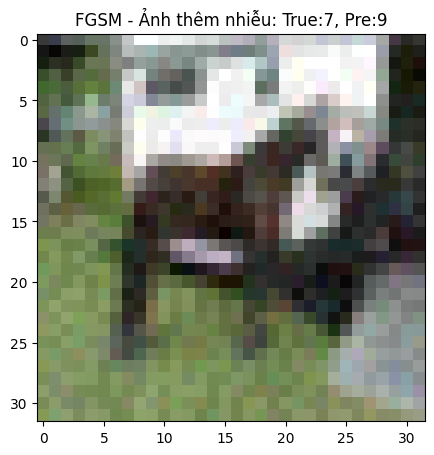

Ảnh gốc thứ: 22

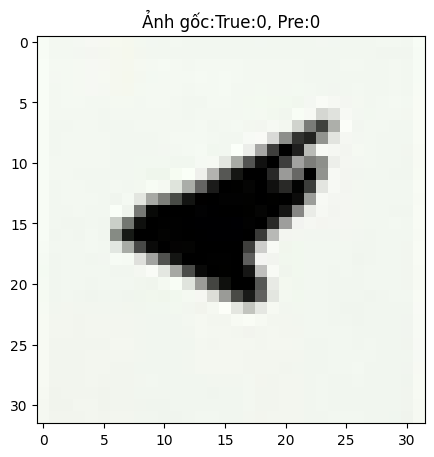

Ảnh sau khi thêm nhiễu: 22


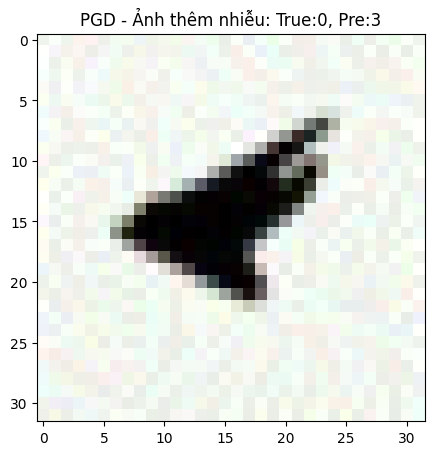

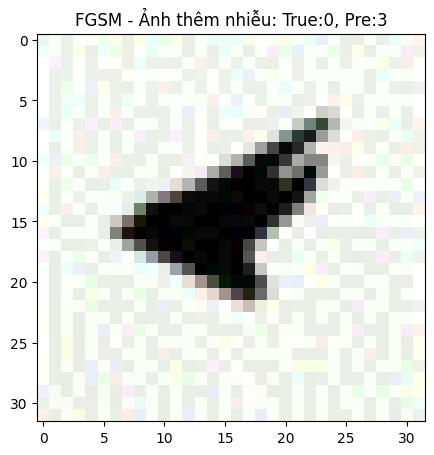

Ảnh gốc thứ: 23

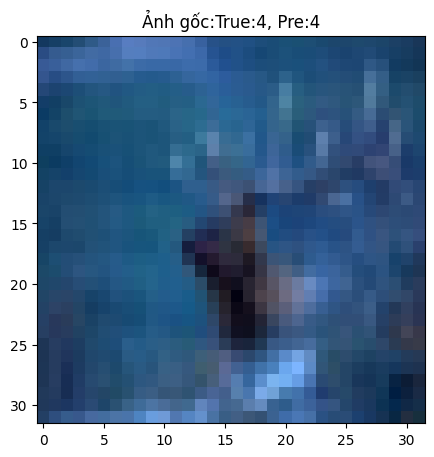

Ảnh sau khi thêm nhiễu: 23


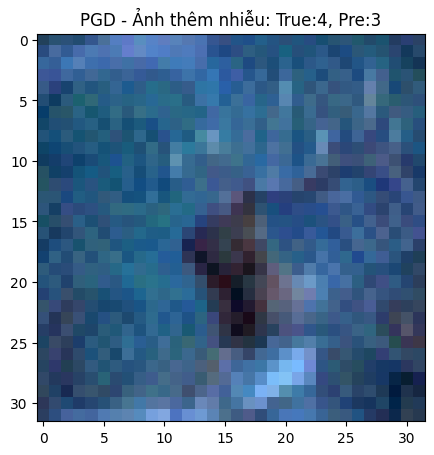

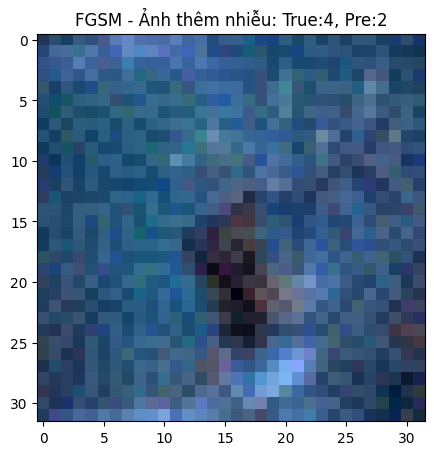

Ảnh gốc thứ: 24

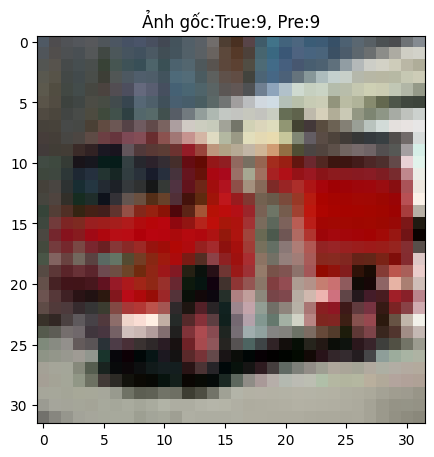

Ảnh sau khi thêm nhiễu: 24


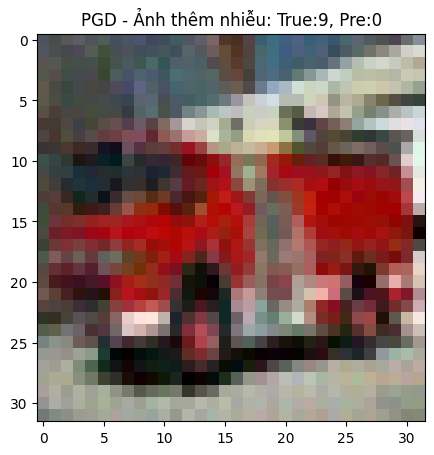

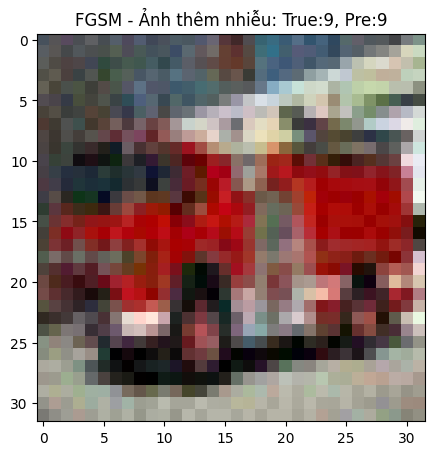

Ảnh gốc thứ: 25

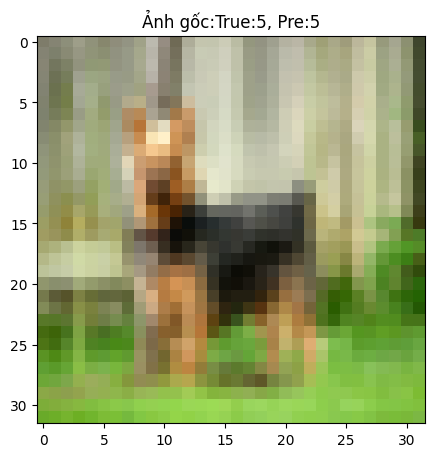

Ảnh sau khi thêm nhiễu: 25


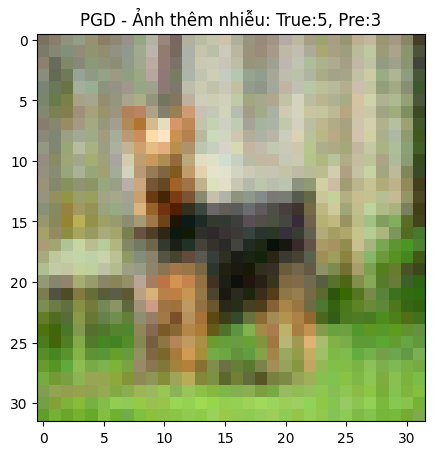

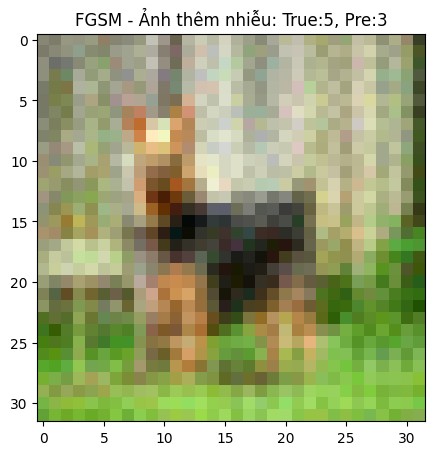

Ảnh gốc thứ: 26

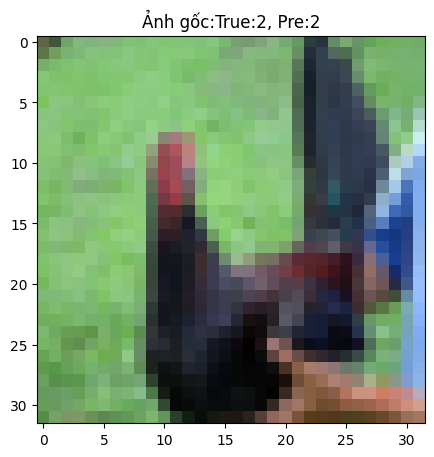

Ảnh sau khi thêm nhiễu: 26


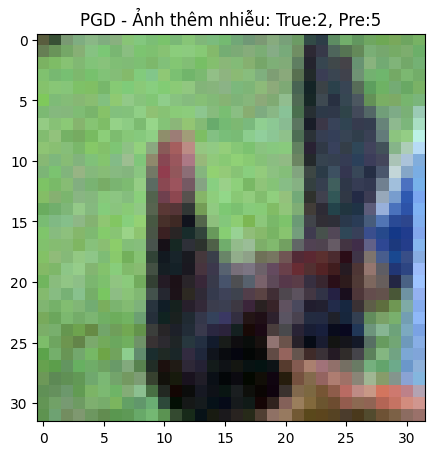

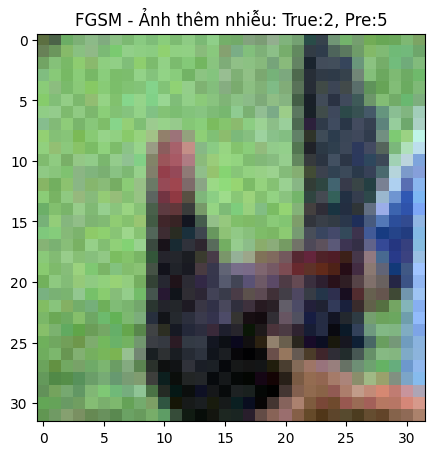

Ảnh gốc thứ: 27

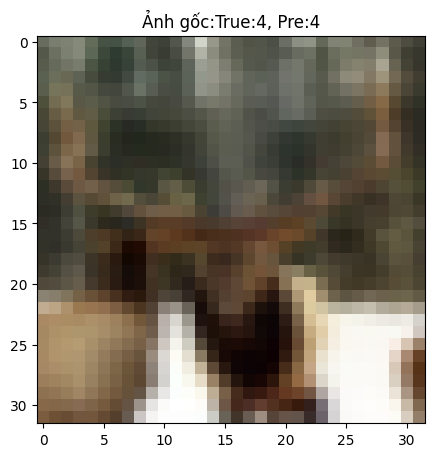

Ảnh sau khi thêm nhiễu: 27


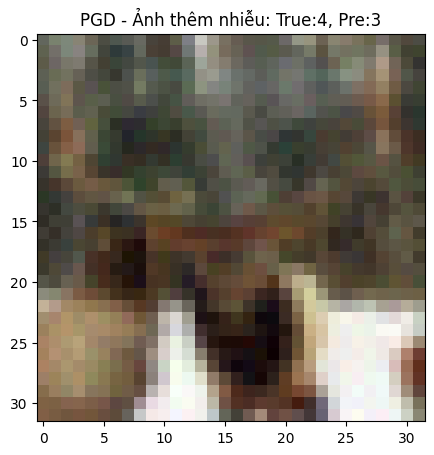

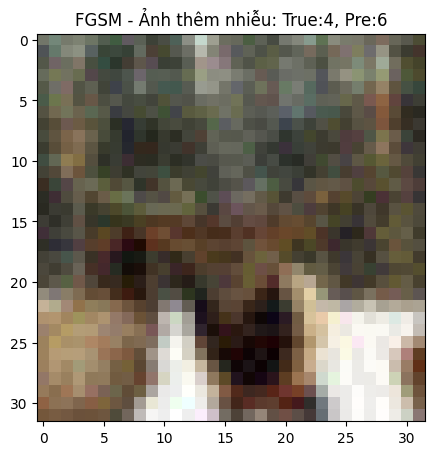

Ảnh gốc thứ: 28

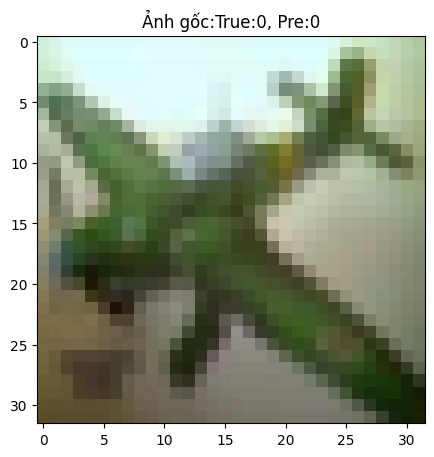

Ảnh sau khi thêm nhiễu: 28


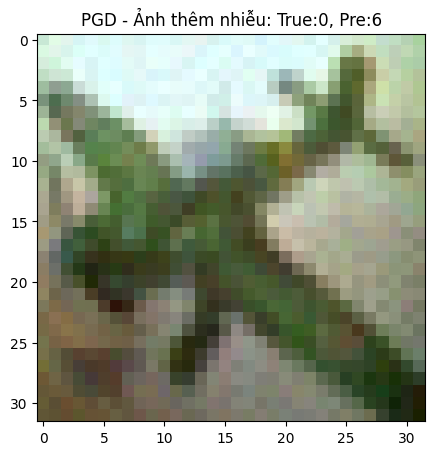

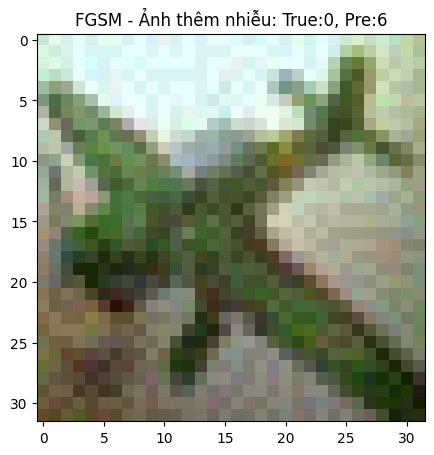

Ảnh gốc thứ: 29

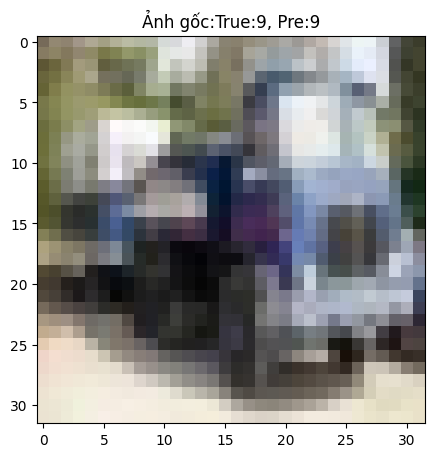

Ảnh sau khi thêm nhiễu: 29


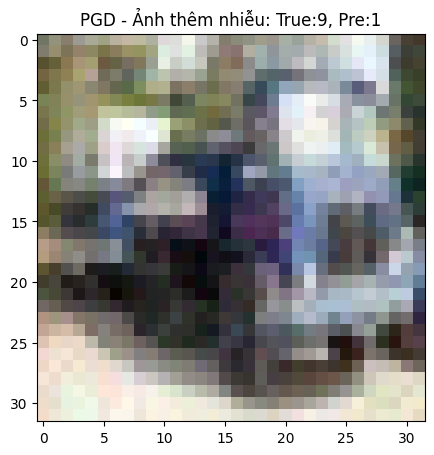

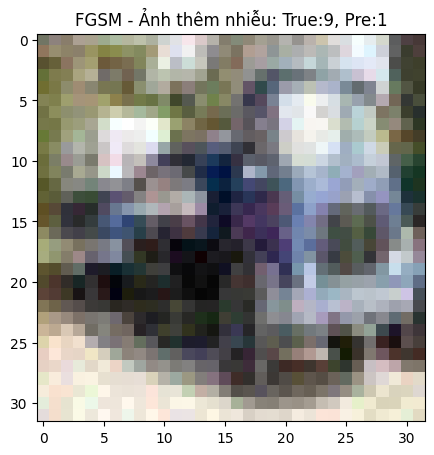

Ảnh gốc thứ: 30

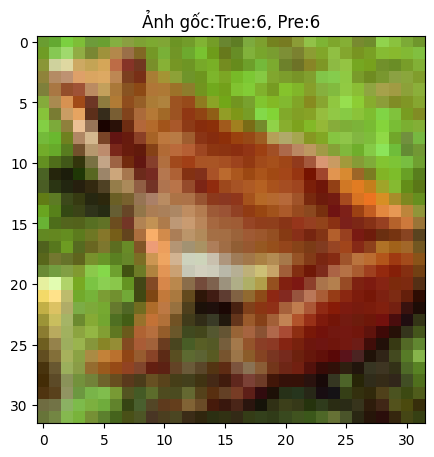

Ảnh sau khi thêm nhiễu: 30


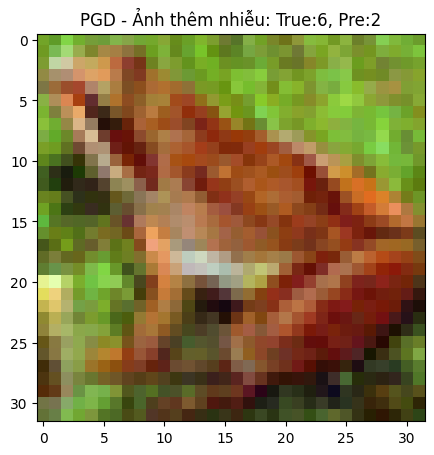

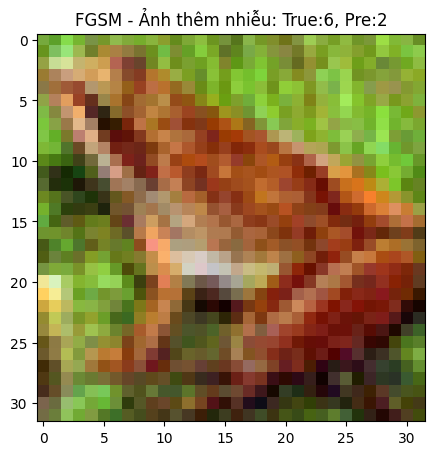

Ảnh gốc thứ: 31

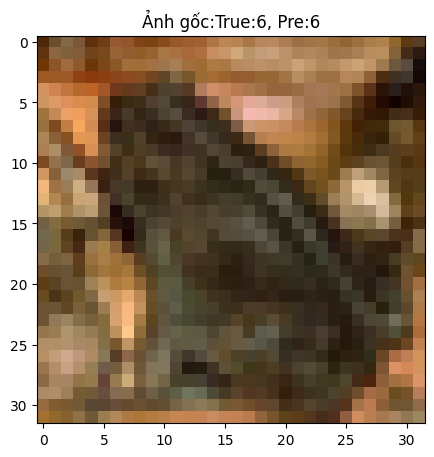

Ảnh sau khi thêm nhiễu: 31


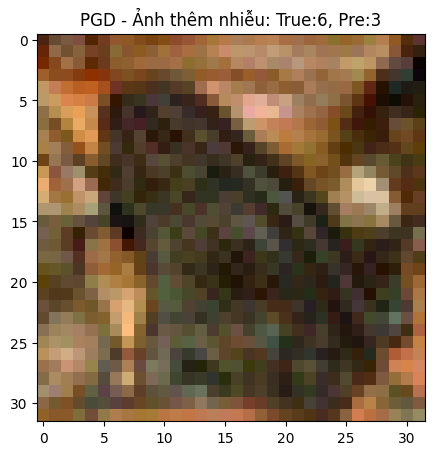

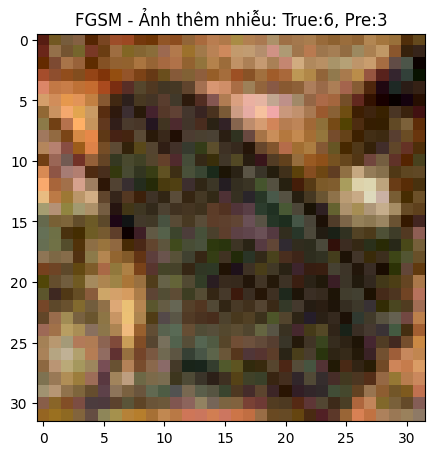

Ảnh gốc thứ: 32

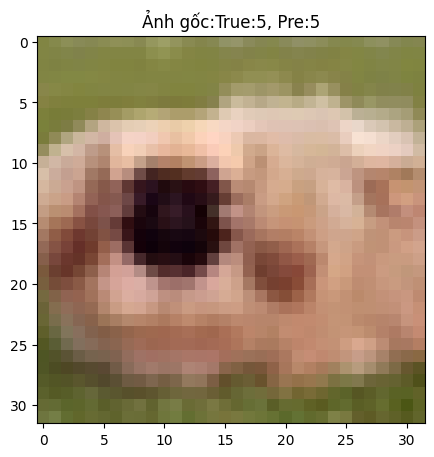

Ảnh sau khi thêm nhiễu: 32


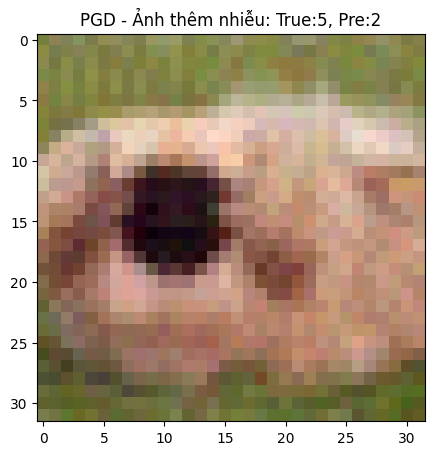

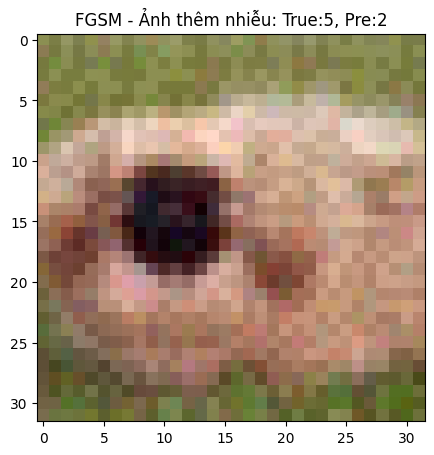

Ảnh gốc thứ: 33

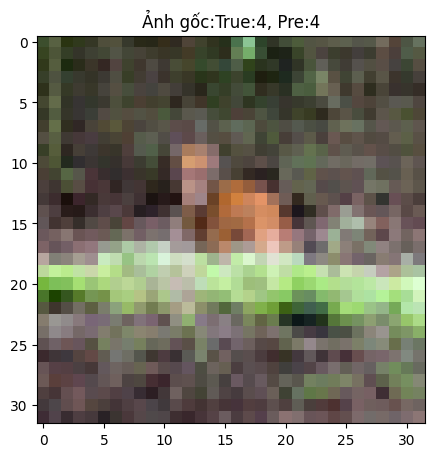

Ảnh sau khi thêm nhiễu: 33


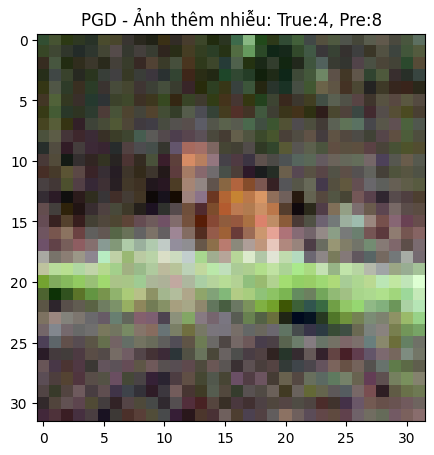

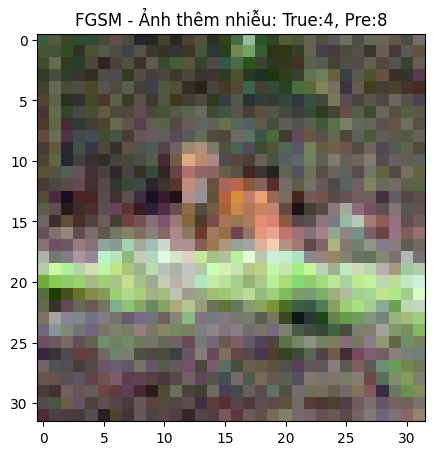

Ảnh gốc thứ: 34

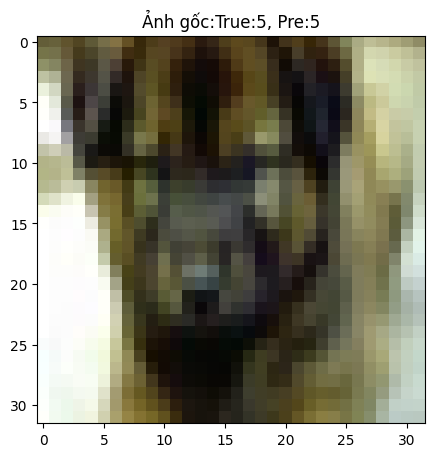

Ảnh sau khi thêm nhiễu: 34


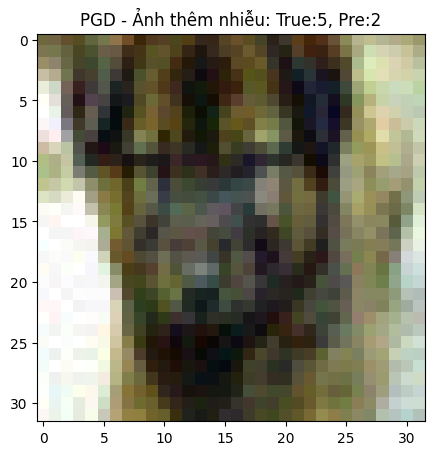

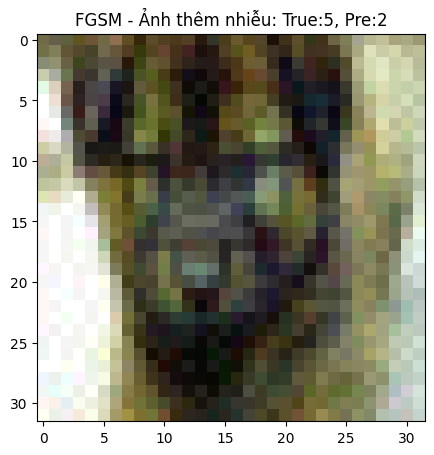

Ảnh gốc thứ: 35

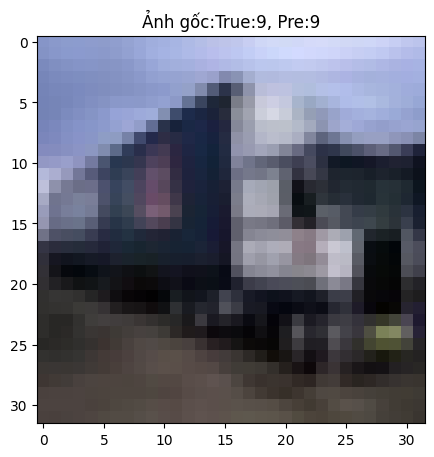

Ảnh sau khi thêm nhiễu: 35


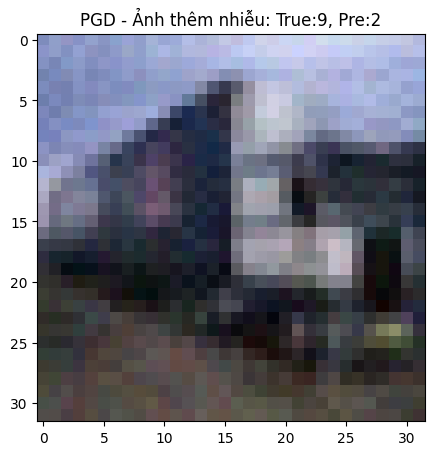

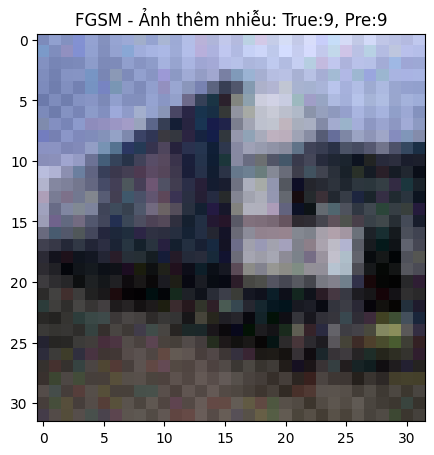

Ảnh gốc thứ: 36

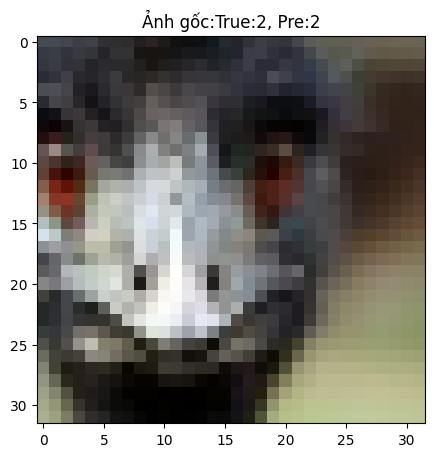

Ảnh sau khi thêm nhiễu: 36


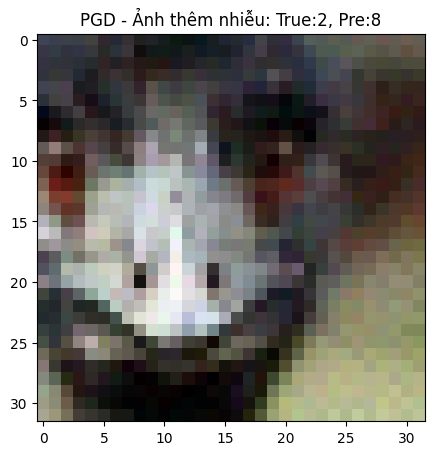

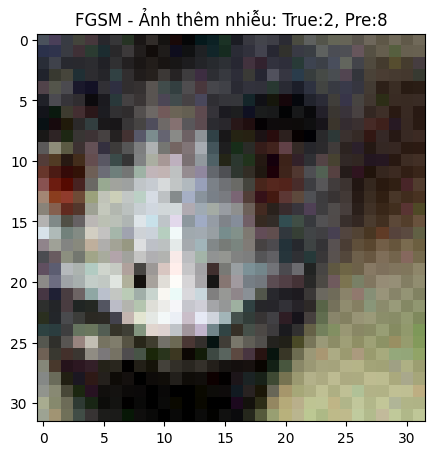

Ảnh gốc thứ: 37

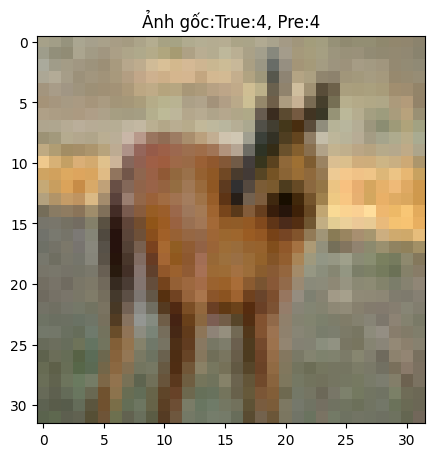

Ảnh sau khi thêm nhiễu: 37


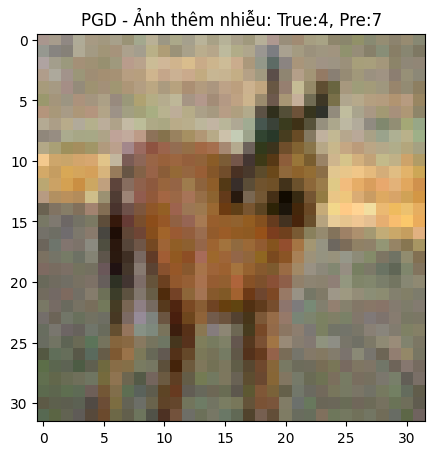

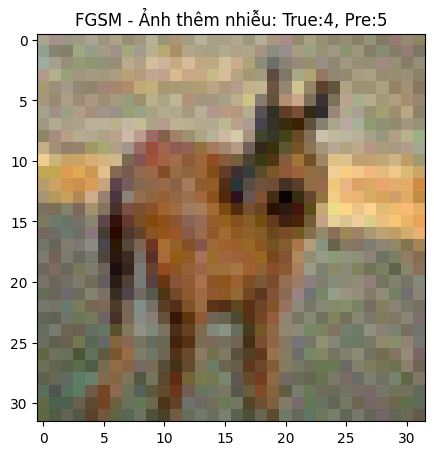

Ảnh gốc thứ: 38

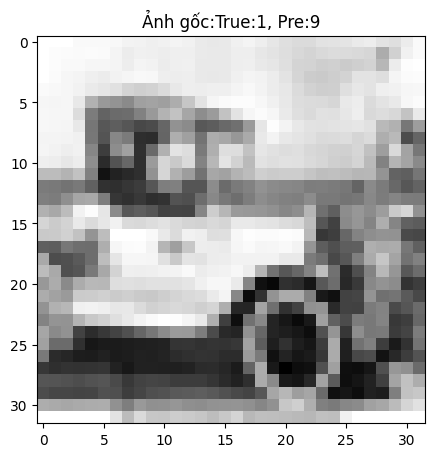

Ảnh sau khi thêm nhiễu: 38


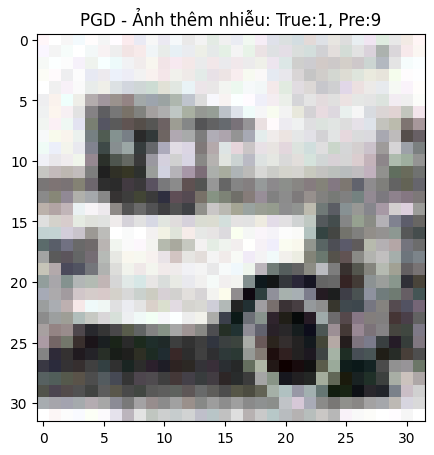

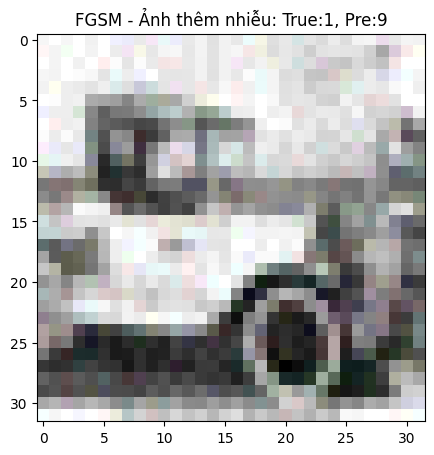

Ảnh gốc thứ: 39

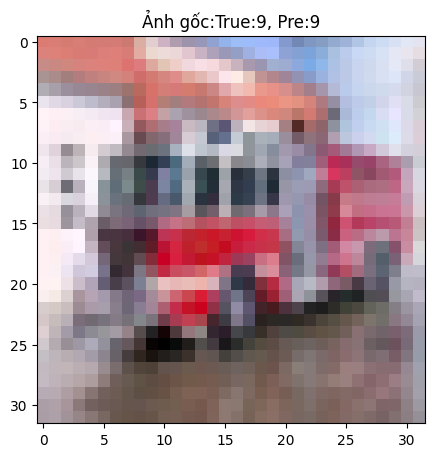

Ảnh sau khi thêm nhiễu: 39


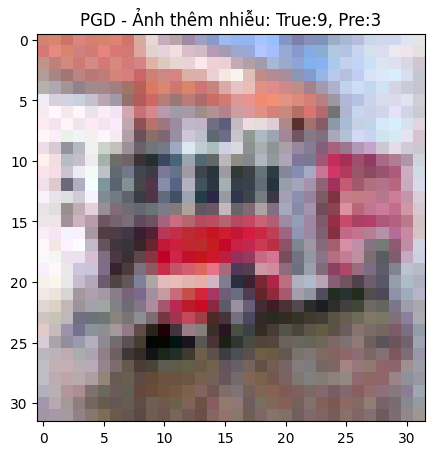

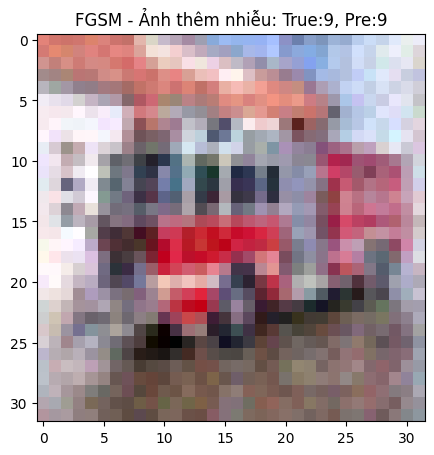

Ảnh gốc thứ: 40

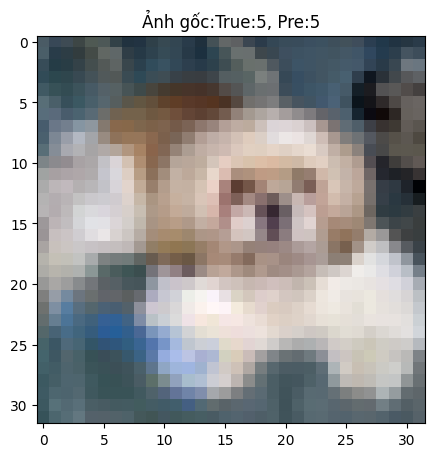

Ảnh sau khi thêm nhiễu: 40


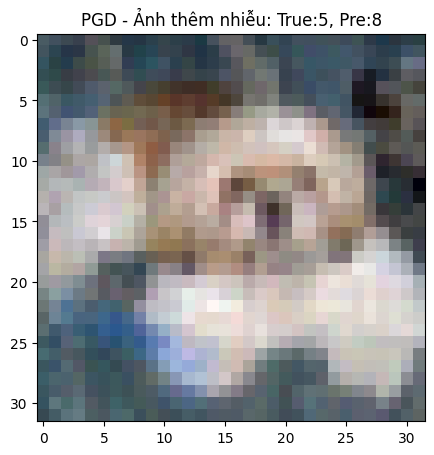

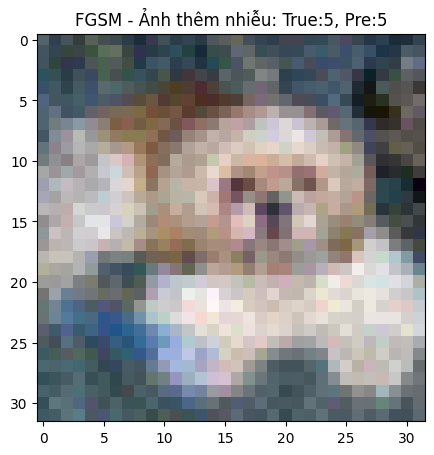

Ảnh gốc thứ: 41

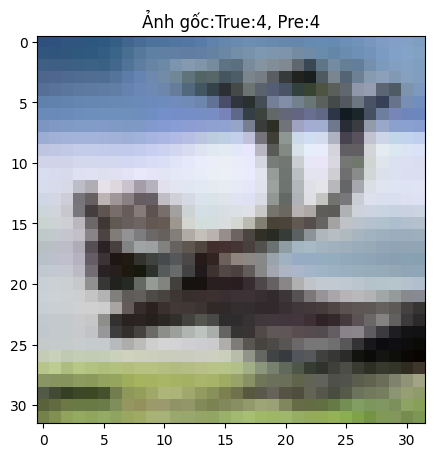

Ảnh sau khi thêm nhiễu: 41


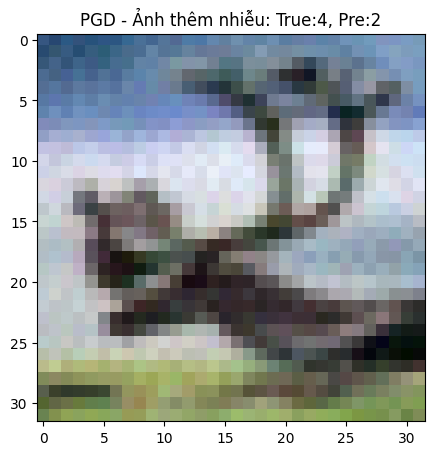

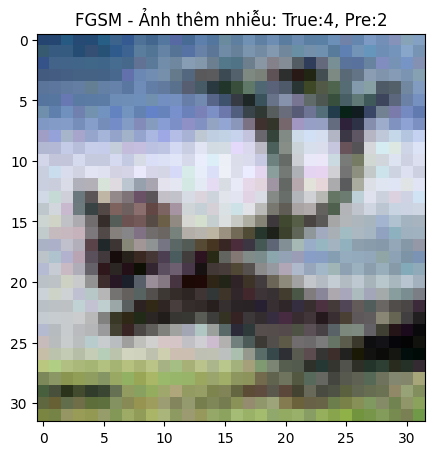

Ảnh gốc thứ: 42

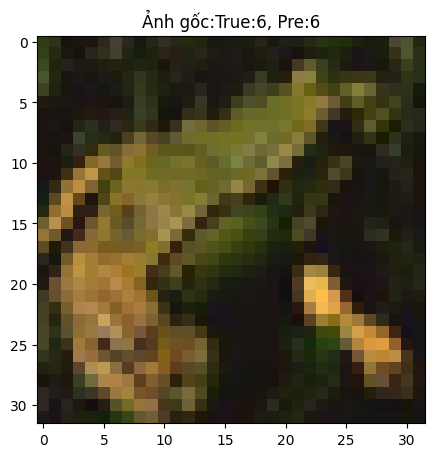

Ảnh sau khi thêm nhiễu: 42


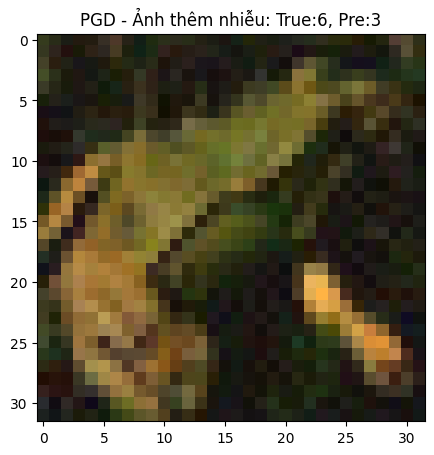

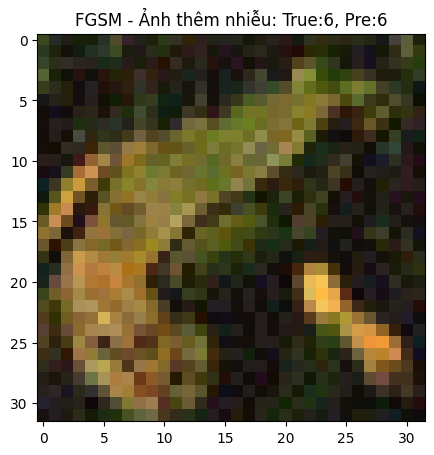

Ảnh gốc thứ: 43

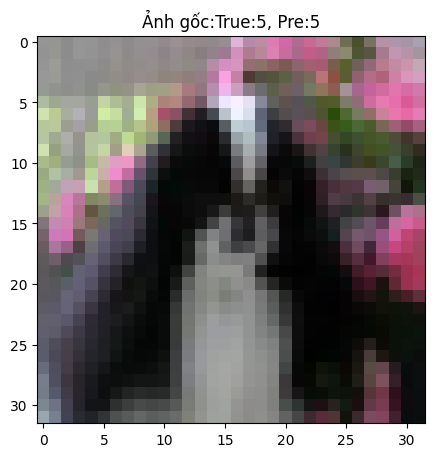

Ảnh sau khi thêm nhiễu: 43


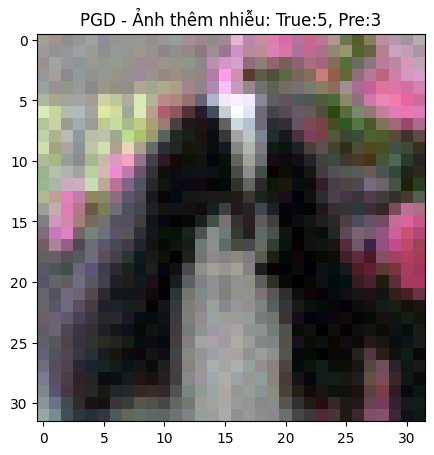

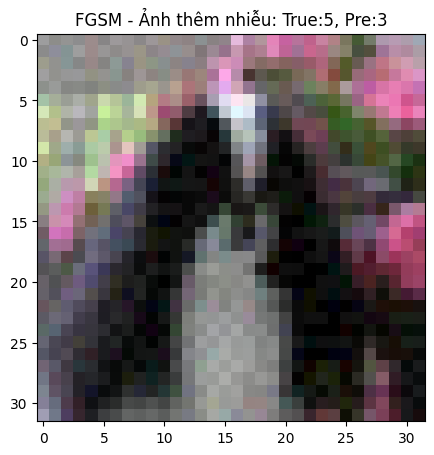

Ảnh gốc thứ: 44

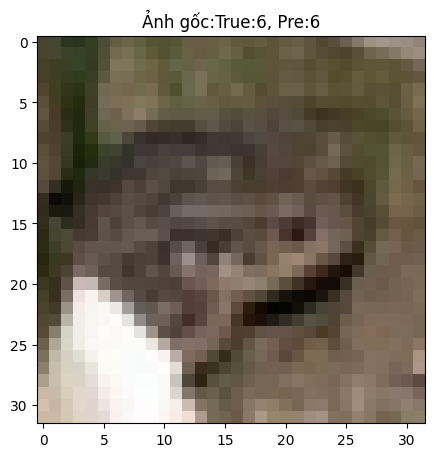

Ảnh sau khi thêm nhiễu: 44


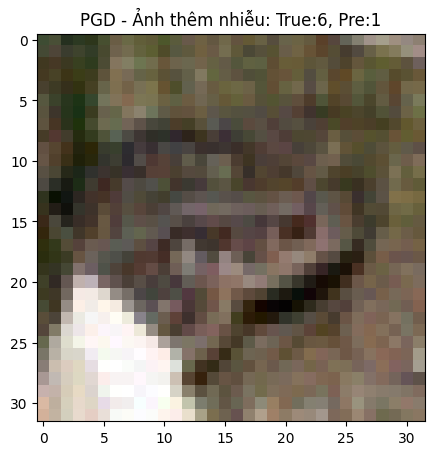

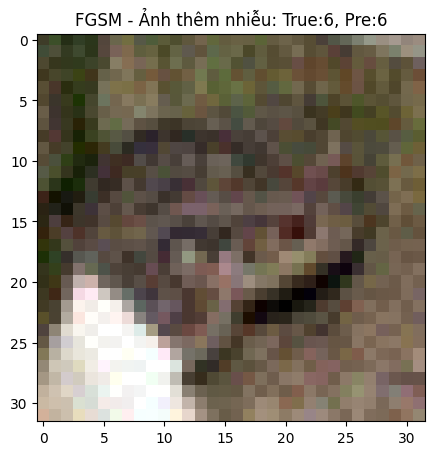

Ảnh gốc thứ: 45

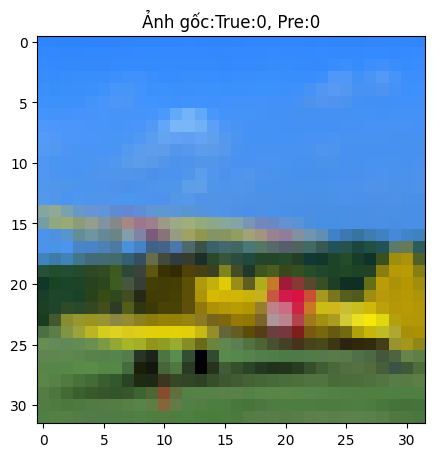

Ảnh sau khi thêm nhiễu: 45


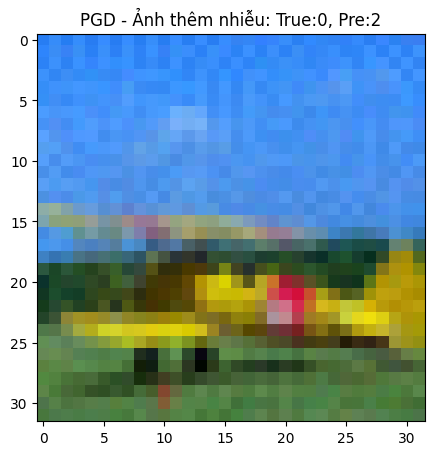

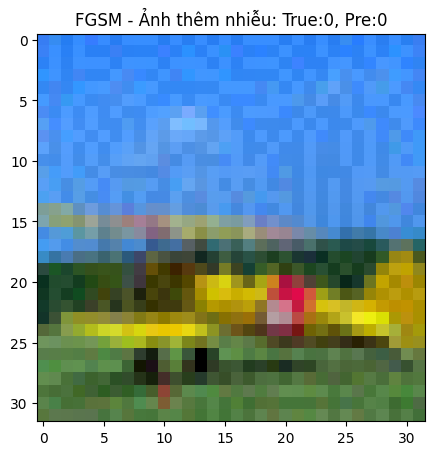

Ảnh gốc thứ: 46

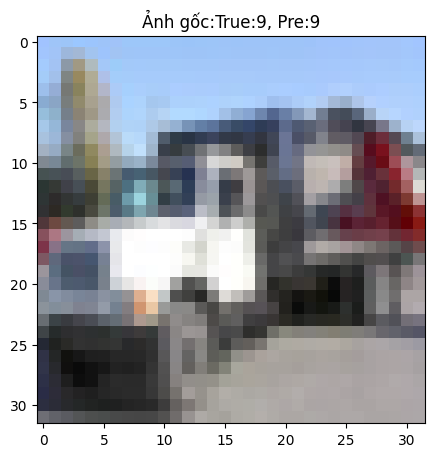

Ảnh sau khi thêm nhiễu: 46


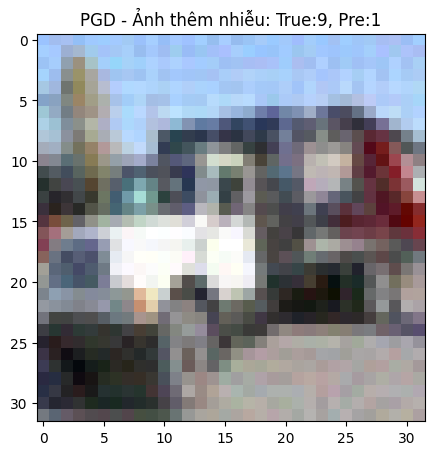

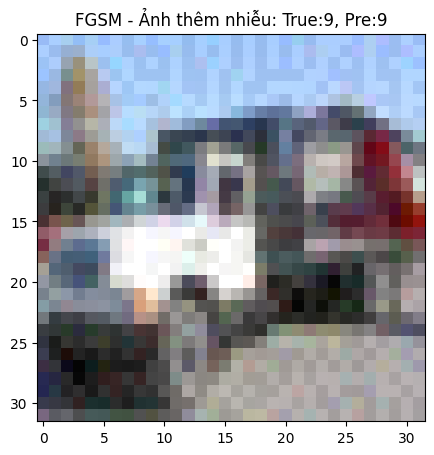

Ảnh gốc thứ: 47

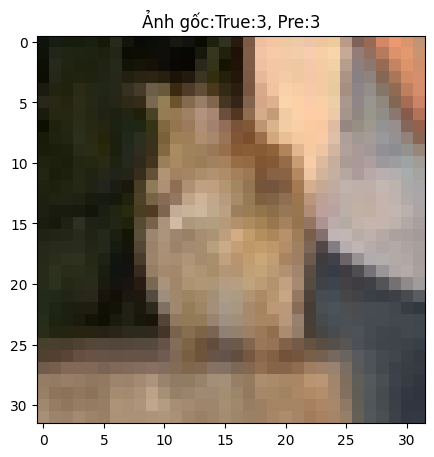

Ảnh sau khi thêm nhiễu: 47


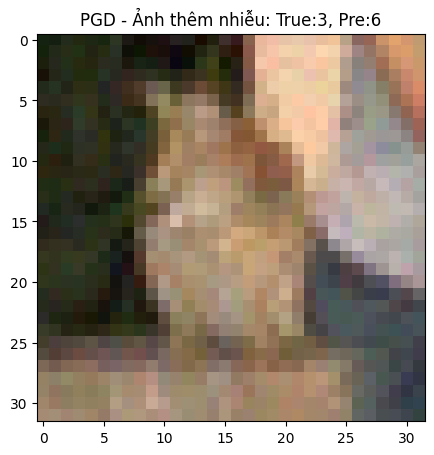

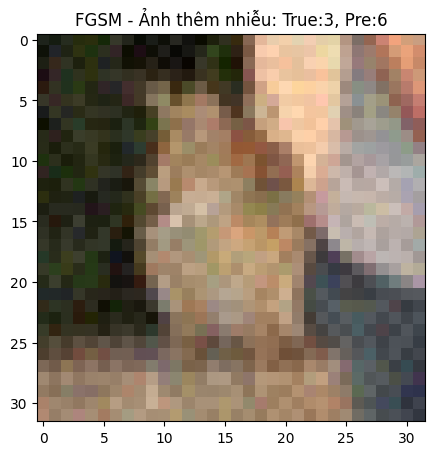

Ảnh gốc thứ: 48

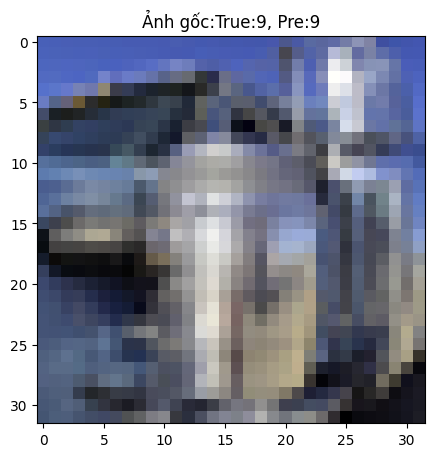

Ảnh sau khi thêm nhiễu: 48


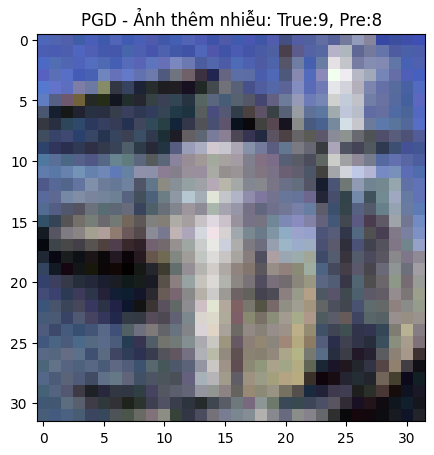

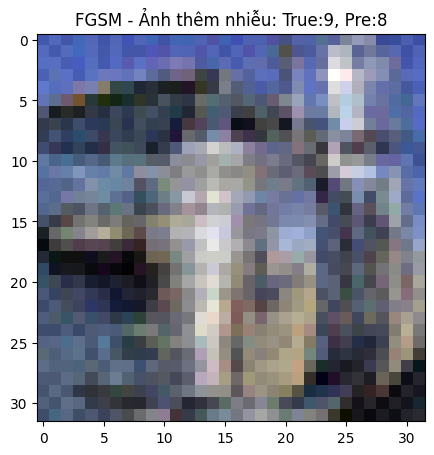

Ảnh gốc thứ: 49

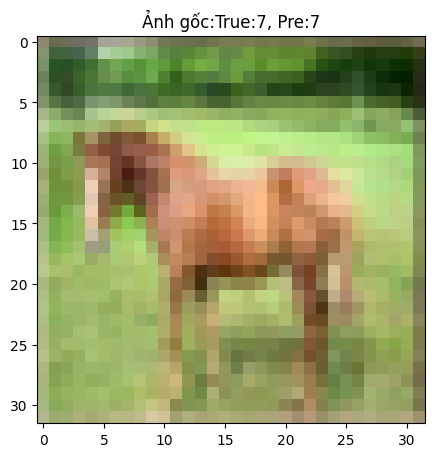

Ảnh sau khi thêm nhiễu: 49


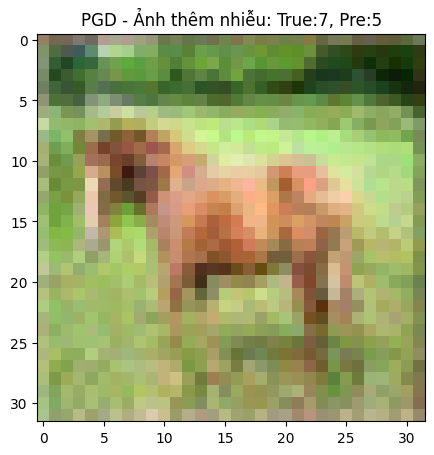

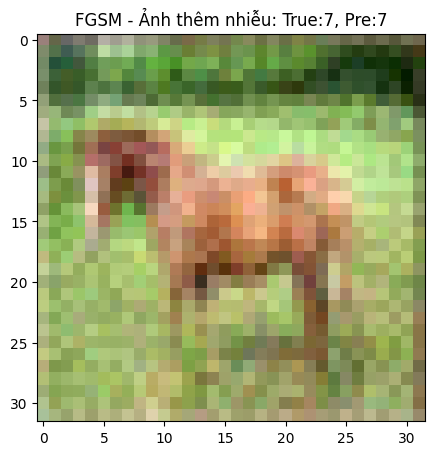

Ảnh gốc thứ: 50

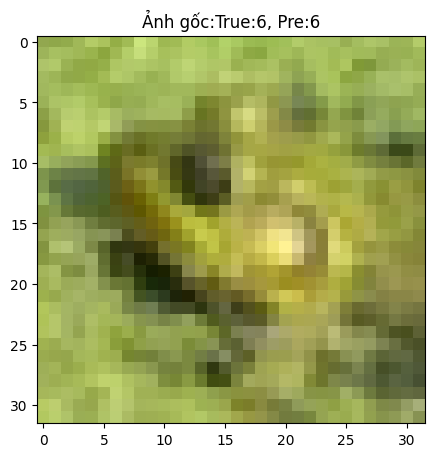

Ảnh sau khi thêm nhiễu: 50


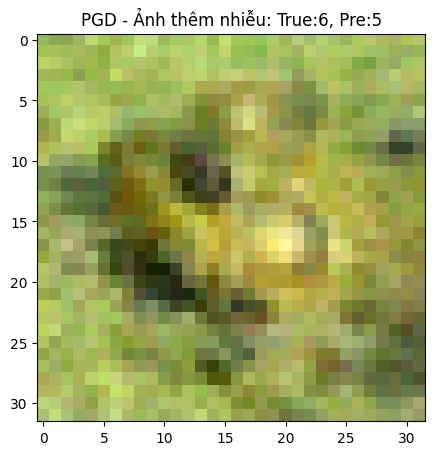

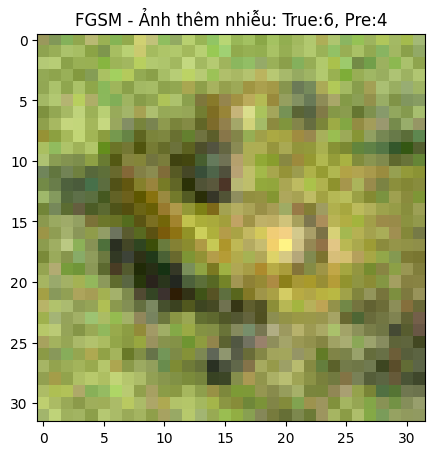

In [12]:

for i in range(len(images)):
    pre = get_pred(model, images[i:i+1], device)
    prepgd = get_pred(model, adv_images_pgd[i:i+1], device)
    prefgsm = get_pred(model, adv_images_fgsm[i:i+1], device)
    print("Ảnh gốc thứ: "+str(i+1), end = '')
    #hien thi anh goc
    imshow(images[i], title="Ảnh gốc:True:%d, Pre:%d"%(labels[i], pre))
    print("Ảnh sau khi thêm nhiễu: "+str(i+1))
    #hien thi ket qua su dung PGD
    imshow(adv_images_pgd[i], title="PGD - Ảnh thêm nhiễu: True:%d, Pre:%d"%(labels[i], prepgd))
    #hien thi ket qua su dung FGSM
    imshow(adv_images_fgsm[i], title="FGSM - Ảnh thêm nhiễu: True:%d, Pre:%d"%(labels[i], prefgsm))